# 🧪 Mini Project: Estimating CO₂ Removal from Enhanced Rock Weathering (ERW)

## 🔍 Objective
Analyze a dataset with soil pH, rainfall, basalt application rate, and weathering factor to estimate and understand CO₂ removal via enhanced rock weathering (ERW) across five different field sites.

---

## ✅ Tasks Completed
- Previewed the dataset
- Generated summary statistics
- Sorted the sites by estimated CO₂ removal
- Created a bar chart to visualize CO₂ removal by site
- Created a scatter plot to explore the relationship between soil pH and CO₂ removal
- Added a trendline to the scatter plot
- Calculated the correlation coefficient
- Visualized rainfall as a third variable using bubble size in a plot

---

## 💻 Code Features
- Core Python functions for printing and sorting
- `pandas` for data manipulation
- `matplotlib` for visualizations
- `numpy` for numerical analysis (trendline, correlation)

---

## 📊 Insights
- **Charlie** removed the most CO₂ due to high basalt application and favorable conditions.
- There is a **strong negative correlation (r = –0.98)** between soil pH and CO₂ removal.
- Sites with **higher rainfall** (larger bubbles) tended to remove **more CO₂**, supporting the idea that moisture accelerates silicate weathering.


In [1]:
import pandas as pd

# Load your data
data = {
    "Site": ["Alpha", "Bravo", "Charlie", "Delta", "Echo"],
    "Soil_pH": [5.8, 6.2, 5.5, 6.8, 6.0],
    "Annual_Rainfall_mm": [1200, 950, 1350, 800, 1100],
    "Basalt_Application_t_per_ha": [20, 15, 25, 10, 18],
    "Weathering_Factor": [0.7, 0.6, 0.75, 0.5, 0.65]
}

df = pd.DataFrame(data)
df["Estimated_CO2_Removed_t_per_ha"] = df["Basalt_Application_t_per_ha"] * df["Weathering_Factor"] * 0.3

# Show the table
print(df)



      Site  Soil_pH  Annual_Rainfall_mm  Basalt_Application_t_per_ha  \
0    Alpha      5.8                1200                           20   
1    Bravo      6.2                 950                           15   
2  Charlie      5.5                1350                           25   
3    Delta      6.8                 800                           10   
4     Echo      6.0                1100                           18   

   Weathering_Factor  Estimated_CO2_Removed_t_per_ha  
0               0.70                           4.200  
1               0.60                           2.700  
2               0.75                           5.625  
3               0.50                           1.500  
4               0.65                           3.510  


In [8]:
# Print the first few rows of the dataset
print(df.head())

# Get summary statistics (mean, min, max, etc.)
print("\nSummary statistics:")
print(df.describe())

# Sort the sites by highest CO2 removal
df_sorted = df.sort_values(by="Estimated_CO2_Removed_t_per_ha", ascending=False)

# Print the sorted table
print("\nSites sorted by estimated CO2 removal:")
print(df_sorted)


      Site  Soil_pH  Annual_Rainfall_mm  Basalt_Application_t_per_ha  \
0    Alpha      5.8                1200                           20   
1    Bravo      6.2                 950                           15   
2  Charlie      5.5                1350                           25   
3    Delta      6.8                 800                           10   
4     Echo      6.0                1100                           18   

   Weathering_Factor  Estimated_CO2_Removed_t_per_ha  
0               0.70                           4.200  
1               0.60                           2.700  
2               0.75                           5.625  
3               0.50                           1.500  
4               0.65                           3.510  

Summary statistics:
        Soil_pH  Annual_Rainfall_mm  Basalt_Application_t_per_ha  \
count  5.000000            5.000000                      5.00000   
mean   6.060000         1080.000000                     17.60000   
std    0.487

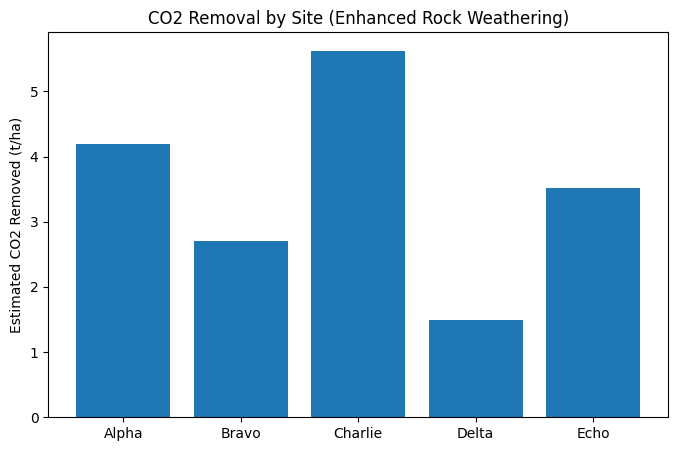

In [10]:
import matplotlib.pyplot as plt

# Bar chart of CO2 removed per site
plt.figure(figsize=(8,5))
plt.bar(df["Site"], df["Estimated_CO2_Removed_t_per_ha"])
plt.ylabel("Estimated CO2 Removed (t/ha)")
plt.title("CO2 Removal by Site (Enhanced Rock Weathering)")
plt.show()


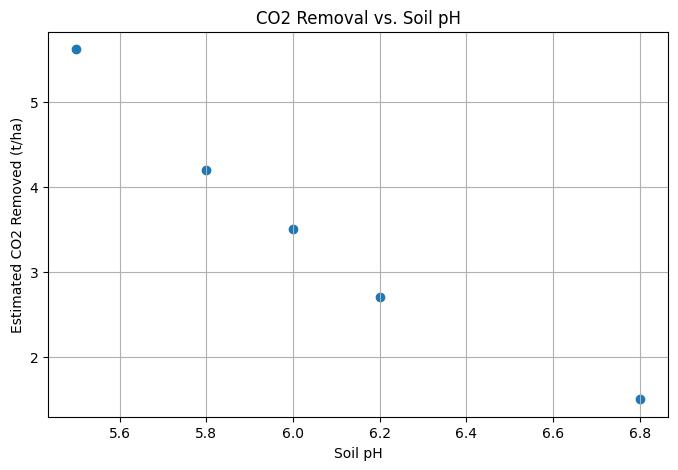

In [11]:
# Scatter plot: Soil pH vs. CO2 removal
plt.figure(figsize=(8,5))
plt.scatter(df["Soil_pH"], df["Estimated_CO2_Removed_t_per_ha"])
plt.xlabel("Soil pH")
plt.ylabel("Estimated CO2 Removed (t/ha)")
plt.title("CO2 Removal vs. Soil pH")
plt.grid(True)
plt.show()


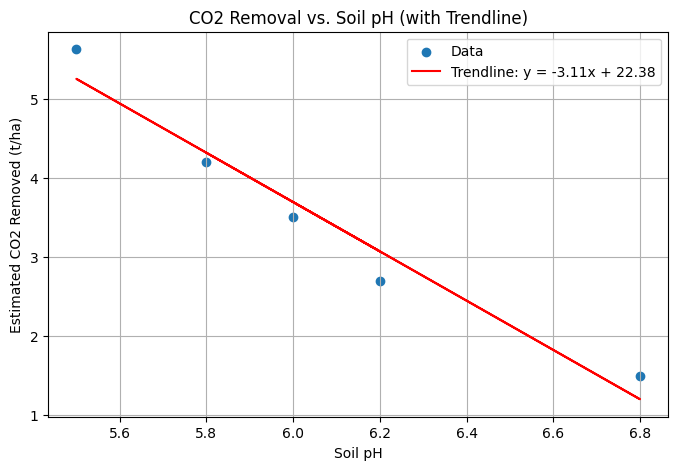

In [12]:
import numpy as np

# Extract variables
x = df["Soil_pH"]
y = df["Estimated_CO2_Removed_t_per_ha"]

# Fit a linear trendline
coeffs = np.polyfit(x, y, 1)  # 1 = linear
trend = np.poly1d(coeffs)

# Plot original scatter
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Data")
plt.plot(x, trend(x), color="red", label=f"Trendline: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}")
plt.xlabel("Soil pH")
plt.ylabel("Estimated CO2 Removed (t/ha)")
plt.title("CO2 Removal vs. Soil pH (with Trendline)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Calculate correlation between soil pH and CO2 removal
correlation = np.corrcoef(x, y)[0, 1]
print(f"Correlation coefficient (r): {correlation:.2f}")


Correlation coefficient (r): -0.98


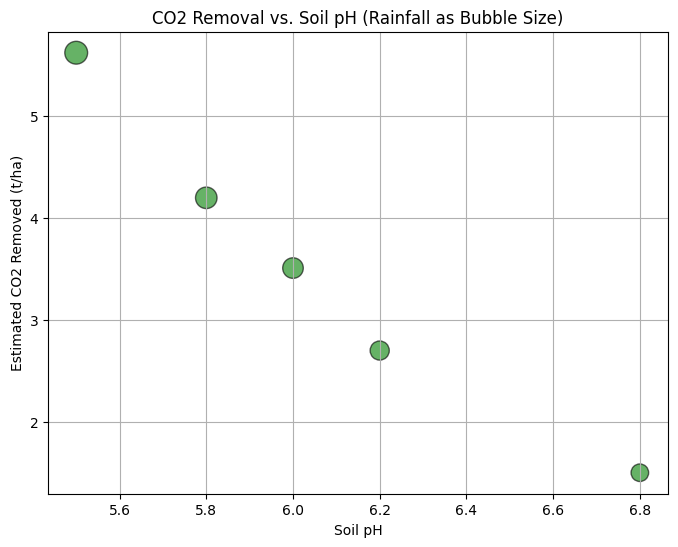

In [14]:
# Bubble plot with rainfall as size
plt.figure(figsize=(8,6))
plt.scatter(df["Soil_pH"], df["Estimated_CO2_Removed_t_per_ha"],
            s=df["Annual_Rainfall_mm"] / 5,  # adjust size scaling
            alpha=0.6, c="green", edgecolors="black")

plt.xlabel("Soil pH")
plt.ylabel("Estimated CO2 Removed (t/ha)")
plt.title("CO2 Removal vs. Soil pH (Rainfall as Bubble Size)")
plt.grid(True)
plt.show()
